In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shutil import copy2
from keras.preprocessing import image
from keras import models, layers, optimizers, losses, metrics
from keras.models import model_from_json

plt.style.use('seaborn')
#pip install h5py==2.8.0rc1 # to fix h5py warning issue about numpy

Using TensorFlow backend.


In [2]:
mvc_info = "mvc_info.json"                  #~140Mb
path = "C:/Users/heret/Desktop/mvc"
images_path = "C:/Users/heret/Desktop/mvc/images_selected"

df_mvc_info = pd.read_json(mvc_info)
# print(df_mvc_info.columns)
# print(df_mvc_info.head(2))

### To do
Current model:
- Fix function wrongly_predicted (whats wrong?)
- Test trained model on new data (images from DeepFashion?)  

Next steps:
- Explore VGG16 network
- Research Clothes Retrieval -  How do we go about from this point to final model?


Next iteration for this model:
- Create function that adds photos from unique products with different colours to training data
- Optimise Network
- Other data augmentation
- Test trained model on new data (images from DeepFashion?)

In [3]:
pd.options.mode.chained_assignment = None  

def remove_dups(df):
    df_delete = pd.read_csv("duplicates_delete.csv", header=None)
    for filename in df_delete[1]:
        dup_index = df_unique_products[df_unique_products["filename"].str.contains(filename)].index
        df_unique_products.drop(dup_index, inplace=True)

df_unique_products = df_mvc_info.drop_duplicates(subset="productId", keep="first")
df_unique_products["filename"] = "p" + df_unique_products["productId"].map(str) + "_s" + df_unique_products["styleId"].map(str) + "_v0.jpg"
df_unique_products["subCategory2"] = df_unique_products["subCategory2"].str.replace('"', "")
remove_dups(df_unique_products)
print(df_unique_products.shape)

(23181, 24)


### Fixing Wrong labels

In [4]:
# def extract_categories(df, classes, images_path):
#     """
#     - classes need to match the category labels
#     - images_path is the absolute path to the img folder
#     """
                   
#     assert (type(classes) == list), "needs to be in list format"
    
#     path_cwd = os.getcwd() #using output path by default

#     for n, each_class in enumerate(classes):
#         clothes_class = df[df["subCategory2"] == each_class]["filename"].tolist()
#         #make folders and subfolders
#         os.makedirs("./categories/" + each_class.lower(), exist_ok=True)

#         for img_name in clothes_class: #iterate over each filename
#             origin_path = os.path.join(images_path, img_name)
#             destination_path = os.path.join("./categories/", each_class.lower(), img_name)
#             copy2(origin_path, destination_path) #will copy the images from origin to destination folder

# %%time
# extract_categories(df_unique_products,
#                  ["Long Sleeve Tops","Short Sleeve Tops", "Jackets and Coats",
#                   "Sleeveless Tops", "Dresses", "Pants", "Jeans"],
#                  images_path=images_path
#                 )

In [5]:
wrong_labels = [
#Dresses
["p7920484_s1761723_v0.jpg", "Delete"], ["p7920490_s1761721_v0.jpg", "Delete"],
["p8093319_s2151369_v0.jpg", "Delete"],["p8294962_s2617286_v0.jpg", "Delete"],
["p8504615_s3107485_v0.jpg", "Delete"], ["p8529310_s3158939_v0.jpg", "Pants"], 
["p8547147_s3205428_v0.jpg", "Delete"], ["p8567885_s3255380_v0.jpg", "Delete"],
["p8573532_s3267245_v0.jpg", "Delete"], ["p8603479_s3327446_v0.jpg", "Jackets and Coats"],
["p8611138_s3346751_v0.jpg", "Long Sleeve Tops"], ["p8614892_s3355841_v0.jpg", "Delete"],
["p8614909_s3355868_v0.jpg", "Long Sleeve Tops"], ["p8656763_s3454959_v0.jpg", "Delete"],
["p8657681_s3456688_v0.jpg", "Pants"], ["p8678505_s3502687_v0.jpg", "Pants"],
["p8678660_s3503027_v0.jpg", "Pants"], ["p8687809_s3522706_v0.jpg", "Delete"],
#"Jackets and Coats"
["p8351313_s2756550_v0.jpg", "Delete"], ["p8553114_s3219971_v0.jpg", "Delete"],
["p8562966_s3245218_v0.jpg", "Delete"], ["p8611422_s3350207_v0.jpg", "Delete"],
["p8611423_s3350209_v0.jpg", "Delete"], ["p8611424_s3350210_v0.jpg", "Delete"],
["p8611425_s3350213_v0.jpg", "Delete"], ["p8611426_s3350211_v0.jpg", "Delete"],
["p8611428_s3350208_v0.jpg", "Delete"], ["p8681103_s3508241_v0.jpg", "Delete"],
#"Jeans"
["p7920489_s3258096_v0.jpg", "Delete"],
#"Pants"
#"Long Sleeve Tops"
["p8446572_s2971906_v0.jpg", "Sleeveless Tops"], ["p8456535_s3300345_v0.jpg", "Sleeveless Tops"],
["p8456636_s2999138_v0.jpg", "Sleeveless Tops"], ["p8486633_s3067249_v0.jpg", "Sleeveless Tops"],
["p8486654_s3333125_v0.jpg", "Sleeveless Tops"], ["p8503818_s3105923_v0.jpg", "Sleeveless Tops"],
["p8503821_s3351074_v0.jpg", "Sleeveless Tops"], ["p8512142_s3123229_v0.jpg", "Short Sleeve Tops"],
["p8512143_s3123238_v0.jpg", "Short Sleeve Tops"], ["p8512145_s3123234_v0.jpg", "Short Sleeve Tops"],
["p8527949_s3156272_v0.jpg", "Short Sleeve Tops"], ["p8589627_s3299277_v0.jpg", "Sleeveless Tops"],
["p8680306_s3506405_v0.jpg", "Delete"],["p8707209_s3276326_v0.jpg", "Short Sleeve Tops"],
#"Sleeveless Tops"
["p8540636_s3188526_v0.jpg", "Delete"], ["p8612687_s3352259_v0.jpg", "Jackets and Coats"],
["p8615701_s3357264_v0.jpg", "Delete"], ["p8617708_s3360691_v0.jpg", "Delete"],
["p8618661_s3362565_v0.jpg", "Jackets and Coats"], ["p8634092_s3402029_v0.jpg", "Delete"],
["p8634171_s3402196_v0.jpg", "Jackets and Coats"], ["p8633278_s3399415_v0.jpg", "Delete"],
["p8633316_s3399511_v0.jpg", "Dresses"],["p8634729_s3403602_v0.jpg", "Dresses"],
["p8646914_s3433896_v0.jpg", "Jackets and Coats"], ["p8648008_s3436667_v0.jpg", "Jackets and Coats"],
["p8649197_s3439653_v0.jpg", "Delete"], ["p8652932_s3446716_v0.jpg", "Jackets and Coats"],
["p8655772_s3453060_v0.jpg", "Delete"], ["p8657125_s3455578_v0.jpg", "Delete"],
["p8661413_s3464621_v0.jpg", "Jackets and Coats"], ["p8662397_s3467325_v0.jpg", "Delete"],
["p8671102_s3486947_v0.jpg", "Jackets and Coats"], ["p8678934_s3503503_v0.jpg", "Delete"],
["p8678870_s3503429_v0.jpg", "Delete"], ["p8678192_s3501930_v0.jpg", "Delete"],
["p8689118_s3525842_v0.jpg", "Delete"], ["p8690015_s3527568_v0.jpg", "Long Sleeve Tops"],
["p8445259_s3150324_v0.jpg", "Jackets and Coats"], ["p8574627_s3269501_v0.jpg", "Delete"],
["p8574898_s3270248_v0.jpg", "Delete"], ["p8577185_s3275170_v0.jpg", "Jackets and Coats"],
["p8581814_s3284810_v0.jpg", "Delete"], ["p8582872_s3286640_v0.jpg", "Delete"],
["p8584997_s3290837_v0.jpg", "Delete"], ["p8586064_s3292740_v0.jpg", "Delete"],
["p8593525_s3306288_v0.jpg", "Delete"], ["p8593529_s3306292_v0.jpg", "Delete"],
["p8593545_s3306330_v0.jpg", "Delete"], ["p8595643_s3310559_v0.jpg", "Jackets and Coats"],
["p8608490_s3341769_v0.jpg", "Jackets and Coats"], ["p8609617_s3344275_v0.jpg", "Delete"],
["p8609618_s3344274_v0.jpg", "Delete"],
#"Short Sleeve Tops"
["p8426733_s2902052_v0.jpg", "Sleeveless Tops"], ["p8527525_s3155432_v0.jpg", "Sleeveless Tops"],
["p8587915_s3296080_v0.jpg", "Delete"], ["p8587916_s3296086_v0.jpg", "Delete"],
["p8599352_s3319293_v0.jpg", "Delete"], ["p8600368_s3321255_v0.jpg", "Delete"],
["p8603111_s3326617_v0.jpg", "Delete"], ["p8603115_s3326612_v0.jpg", "Delete"],
["p8620000_s3365359_v0.jpg", "Delete"], ["p8621852_s3369118_v0.jpg", "Dresses"],
["p8629447_s3389017_v0.jpg", "Sleeveless"], ["p8629900_s3390470_v0.jpg", "Sleeveless"],
["p8645151_s3429923_v0.jpg", "Delete"], ["p8681095_s3508219_v0.jpg", "Delete"]
]

In [6]:
for label in wrong_labels:
    df_unique_products["subCategory2"][df_unique_products["filename"] == label[0]] = label[1]

In [7]:
df_unique_products = df_unique_products[df_unique_products["subCategory2"] != "Delete"]

### Visualization

Sleeveless Tops       816
Jeans                1946
Pants                2297
Short Sleeve Tops    2383
Jackets and Coats    3044
Dresses              3176
Long Sleeve Tops     5292
Name: subCategory2, dtype: int64


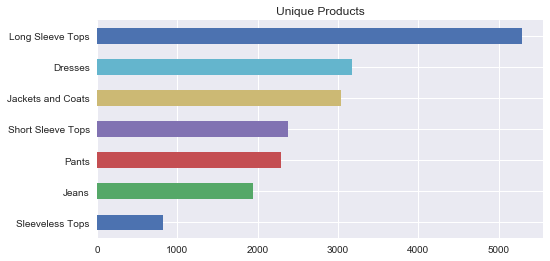

In [8]:
freq_unique_products = df_unique_products["subCategory2"][
    (df_unique_products["subCategory2"] == "Short Sleeve Tops") |
    (df_unique_products["subCategory2"] == "Jackets and Coats") | 
    (df_unique_products["subCategory2"] == "Long Sleeve Tops") | 
    (df_unique_products["subCategory2"] == "Dresses") |
    (df_unique_products["subCategory2"] == "Sleeveless Tops") |
    (df_unique_products["subCategory2"] == "Pants") |
    (df_unique_products["subCategory2"] == "Jeans")
    ].value_counts()

f = plt.figure(figsize=(8,4))
print(freq_unique_products.sort_values(ascending=True))
freq_unique_products.sort_values(ascending=True).tail(50).plot(
    kind="barh",
    title="Unique Products"
    )

plt.show()

In [9]:
def structure_images(df, classes, n_images, data_split, images_path):
    """
    - classes need to match the category labels
    - n_images is n images per class
    - data_split refers to the train, test, val ratio, need to be in format [train, test, val], ie. [0.8, 0.1, 0.1]
    - images_path is the absolute path to the img folder
    """
    assert (type(classes) == list)&(type(n_images) == list)&(type(data_split) == list), "needs to be in list format"
    
    folders = {0: "train", 1: "test",2: "valid"}
    path_cwd = os.getcwd() #using output path by default

    for n, each_class in enumerate(classes):
        clothes_class = df[df["subCategory2"] == each_class].sample(n=n_images[n], random_state=2018)["filename"].tolist()
        #make folders and subfolders
        for folder_n in range(len(folders)):
            os.makedirs(path_cwd + "/deeplearning_images_model/" + folders[folder_n] +"/"+ each_class.lower())#, exist_ok=True)
        #split dataset into train / test / val
        clothes_train, clothes_test, clothes_val = np.split(
            clothes_class,
            [int(data_split[0]*len(clothes_class)),
             int((data_split[0] + data_split[1])*len(clothes_class))]
            )
        clothes_list = [clothes_train, clothes_test, clothes_val]
    
        for n, list_images in enumerate(clothes_list): #iterate over train test val
            for img_name in list_images: #iterate over each filename
                origin_path = os.path.join(images_path, img_name)
                destination_path = os.path.join(path_cwd, "deeplearning_images_model",
                                                folders[n],each_class.lower(), img_name)
                copy2(origin_path, destination_path) #will copy the images from origin to destination folder

In [10]:
def plots(imgs, figsize=(20,6), rows=2, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(imgs)//rows if len(imgs) % 2 == 0 else len(imgs) // rows + 1
    for i in range(len(imgs)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(imgs[i], interpolation=None if interp else'none')

In [11]:
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
def save_model(model, model_path, model_weights_path):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)
    model.save_weights(model_weights_path)
    print("Saved model to disk")

def load_model(model_path, model_weights_path):
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model_weights_path")
    return loaded_model

### Unique Products

In [12]:
%%time
structure_images(df_unique_products,
                 ["Long Sleeve Tops","Short Sleeve Tops", "Jackets and Coats",
                  "Sleeveless Tops", "Dresses", "Pants", "Jeans"],
                 [5000,2000,3000,800,3000,2000,1500],
                 [0.6, 0.2, 0.2],
                 images_path=images_path
                )

Wall time: 26.3 s


In [13]:
#links to where the imgs for the model are
train_path = "deeplearning_images_model/train"
test_path = "deeplearning_images_model/test"
valid_path = "deeplearning_images_model/valid"

train_batches = image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path, target_size=(150,150), class_mode="categorical", batch_size=200, seed=2018
)
test_batches = image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, target_size=(150,150), class_mode="categorical", batch_size=200, shuffle=False
) # if shuffle=True the images indices are shuffled then it will be harder to reconcile the labels # test_batches.index_array
valid_batches = image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    valid_path, target_size=(150,150), class_mode="categorical", batch_size=200, seed=2018
)

Found 10380 images belonging to 7 classes.
Found 3460 images belonging to 7 classes.
Found 3460 images belonging to 7 classes.


{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}


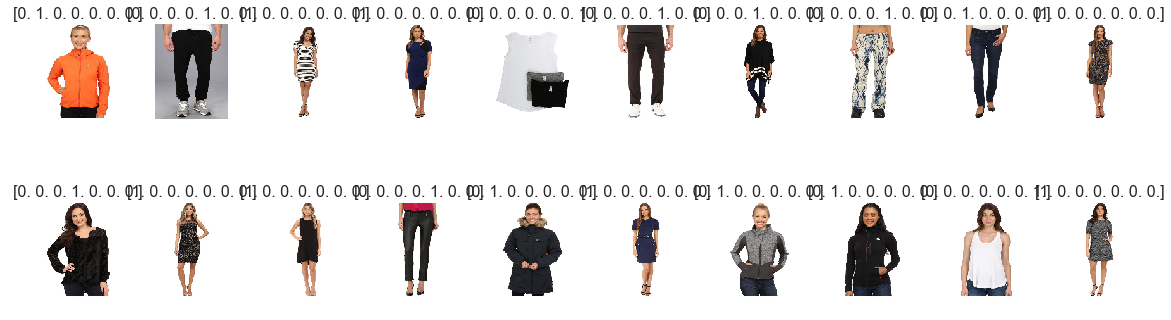

In [14]:
print(train_batches.class_indices)
plots(train_batches[0][0][0:20], titles=train_batches[0][1][0:20])
plt.show()

#### How to: binary classification to multiclass clasification
- Changed class_mode from binary to categorical
- Changed last layer from 1 to "n" classes
- Changed activation function from sigmoid to softmax
- Changed loss from binary_crossentropy to categorical_crossentropy
- Changed metric from binary_accuracy to categorical_accuracy

In [15]:
%%time
m  = models.Sequential()
m.add(layers.Convolution2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
m.add(layers.MaxPooling2D((2,2)))
m.add(layers.Convolution2D(64, (3,3), activation="relu"))
m.add(layers.MaxPooling2D((2,2)))
m.add(layers.Convolution2D(128, (3,3), activation="relu"))
m.add(layers.MaxPooling2D((2,2)))
m.add(layers.Flatten())
m.add(layers.Dense(128, activation="relu"))
m.add(layers.Dense(64, activation="relu"))
m.add(layers.Dense(7, activation="softmax")) #softmax returns a (3,1) vector of probabilities where they all add up to 1

m.compile(
    optimizer=optimizers.rmsprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

h = m.fit_generator(train_batches, epochs=8, steps_per_epoch=20, 
                    validation_data=valid_batches, validation_steps=20)

Epoch 1/8
20/20 [==============================] - 32s 2s/step - loss: 1.9017 - categorical_accuracy: 0.3992 - val_loss: 1.1685 - val_categorical_accuracy: 0.5083
Epoch 2/8
20/20 [==============================] - 27s 1s/step - loss: 0.9360 - categorical_accuracy: 0.6231 - val_loss: 0.8542 - val_categorical_accuracy: 0.6249
Epoch 3/8
20/20 [==============================] - 30s 2s/step - loss: 0.7331 - categorical_accuracy: 0.7122 - val_loss: 0.9393 - val_categorical_accuracy: 0.6824
Epoch 4/8
20/20 [==============================] - 32s 2s/step - loss: 0.6026 - categorical_accuracy: 0.7728 - val_loss: 0.4659 - val_categorical_accuracy: 0.8109
Epoch 5/8
20/20 [==============================] - 31s 2s/step - loss: 0.5067 - categorical_accuracy: 0.8050 - val_loss: 0.4964 - val_categorical_accuracy: 0.8054
Epoch 6/8
20/20 [==============================] - 32s 2s/step - loss: 0.4886 - categorical_accuracy: 0.8210 - val_loss: 0.4260 - val_categorical_accuracy: 0.8365
Epoch 7/8
20/20 [=====

In [16]:
loss, acc = m.evaluate_generator(test_batches)
print(loss, acc)
print((1-acc)*test_batches.n, "images misclassified")

0.44967416000439425 0.8517341010832373
513.0000102519989 images misclassified


In [17]:
def wrongly_classified(model, test, stop=None):
    predictions_test = model.predict_generator(test).round(2)
    test_preds = predictions_test.round()
    
    n_batches = len(test) #flattening batches labels into single array
    test_labels = test[0][1]
    for n in range(int(n_batches)):
        if n == 0:
            continue
        test_labels = np.concatenate((test_labels, test[n][1]))
    # https://github.com/keras-team/keras/blob/c2e36f369b411ad1d0a40ac096fe35f73b9dffd3/keras/metrics.py
    # print("categorical_accuracy: ", np.mean(np.equal(np.argmax(test_labels, axis=-1), np.argmax(test_preds, axis=-1))))
    if (test.num_classes == 2):
        test_preds = test_preds.reshape(1,-1)[0]
        wrong_preds = test_preds != test_labels
        print(wrong_preds.sum(), "images misclassified") #needs to reconcile with the number of wrong predictions

    else:
        wrong_preds = np.array([n.argmax() != m.argmax() for n,m in zip(test_labels, test_preds)])
        print(wrong_preds.sum(), "images misclassified") #needs to reconcile with the number of wrong predictions

    for n, index in enumerate(np.where(wrong_preds)[0]):
        if (stop!=None) and (stop == n):
            break
        print(test.class_indices)
        print("{}. Prediction: {}, Label: {}".format(n+1, predictions_test[index], test_labels[index]))
        
        index_photo = index % test.batch_size
        batch_index_photo = int(np.ceil((index+1)/test.batch_size))-1
        plt.imshow(test[batch_index_photo][0][index_photo])
        plt.axis('Off')
        plt.show()

540 images misclassified
{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
1. Prediction: [0.02 0.06 0.   0.86 0.01 0.03 0.02], Label: [1. 0. 0. 0. 0. 0. 0.]


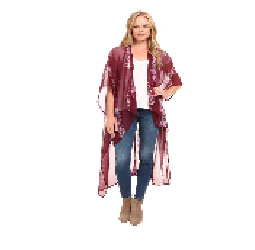

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
2. Prediction: [0.13 0.21 0.   0.61 0.02 0.02 0.01], Label: [1. 0. 0. 0. 0. 0. 0.]


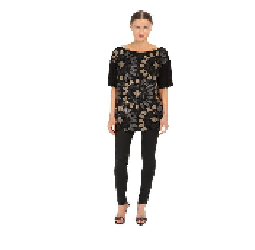

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
3. Prediction: [0.29 0.05 0.01 0.13 0.52 0.   0.01], Label: [1. 0. 0. 0. 0. 0. 0.]


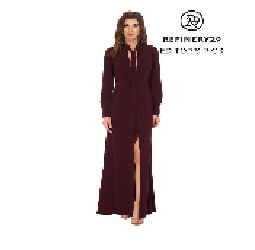

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
4. Prediction: [0. 0. 0. 0. 0. 0. 1.], Label: [1. 0. 0. 0. 0. 0. 0.]


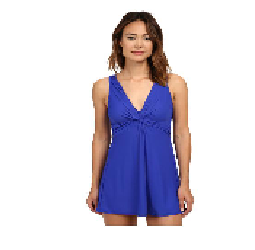

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
5. Prediction: [0.   0.39 0.01 0.56 0.02 0.   0.02], Label: [1. 0. 0. 0. 0. 0. 0.]


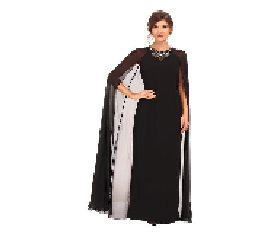

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
6. Prediction: [0.   0.47 0.   0.25 0.   0.09 0.19], Label: [0. 1. 0. 0. 0. 0. 0.]


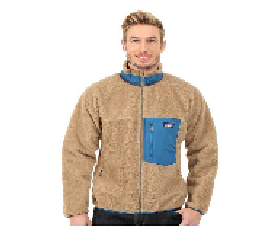

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
7. Prediction: [0.   0.03 0.   0.97 0.   0.   0.  ], Label: [0. 1. 0. 0. 0. 0. 0.]


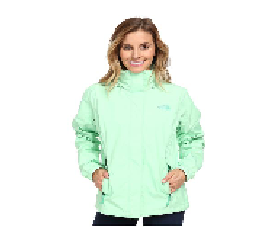

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
8. Prediction: [0.   0.46 0.   0.54 0.   0.   0.  ], Label: [0. 1. 0. 0. 0. 0. 0.]


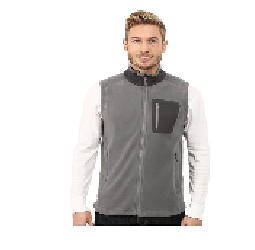

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
9. Prediction: [0.01 0.09 0.01 0.87 0.02 0.   0.  ], Label: [0. 1. 0. 0. 0. 0. 0.]


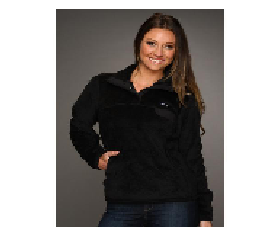

{'dresses': 0, 'jackets and coats': 1, 'jeans': 2, 'long sleeve tops': 3, 'pants': 4, 'short sleeve tops': 5, 'sleeveless tops': 6}
10. Prediction: [0.   0.04 0.   0.95 0.   0.   0.  ], Label: [0. 1. 0. 0. 0. 0. 0.]


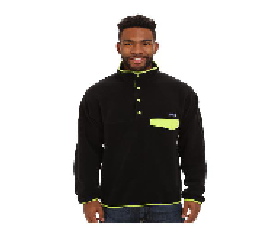

In [18]:
wrongly_classified(m, test_batches, stop=10)

In [19]:
def plot_categories(model, test):
    predictions_test = model.predict_generator(test).round(2)
    test_preds = predictions_test.round()

    n_batches = len(test) #flattening batches labels into single array
    test_labels = test[0][1]
    for n in range(int(n_batches)):
        if n == 0:
            continue
        test_labels = np.concatenate((test_labels, test[n][1]))

    if (test.num_classes == 2):
        test_preds = test_preds.reshape(1,-1)[0]
        wrong_preds = test_preds != test_labels
    else:
        wrong_preds = np.array([n.argmax() != m.argmax() for n,m in zip(test_labels, test_preds)])

    wrong_labels = test_labels[np.where(wrong_preds)]
    wrong_labels = [np.argmax(label) for label in wrong_labels]

    dict_classes = test.class_indices
    dict_classes = {v: k for k, v in dict_classes.items()} #reversing dictionary
    misclassified_df = pd.DataFrame(wrong_labels, columns=["categories"])["categories"].map(dict_classes)
    misclassified_df = misclassified_df.value_counts().sort_values()
    all_labels_df = pd.DataFrame(test.classes, columns=["categories"])["categories"].map(dict_classes)
    all_labels_df = all_labels_df.value_counts().sort_values()

    final_df = pd.DataFrame(all_labels_df).join(misclassified_df, lsuffix="_absolute")
    final_df["absolute_ratio"] = final_df["categories"].apply(lambda x: (x/final_df["categories"].sum()).round(2)) #ratio misses to all misses
    final_df["relative_ratio"] = final_df["categories"]/final_df["categories_absolute"] #ratio misses to total class
    
    f = plt.figure(figsize=(20,8))
    axes = f.subplots(nrows=1, ncols=2, squeeze=False)

    final_df["absolute_ratio"].sort_values().plot(
        ax=axes[0,0],
        kind="barh",
        title="Missclasified classes \n Percentage over all misses"
        )
    plt.plot()

    final_df["relative_ratio"].sort_values().plot(
        ax=axes[0,1],
        kind="barh",
        title="Missclasified classes \n Ratio misses to total labels per class"
        )
    plt.plot()

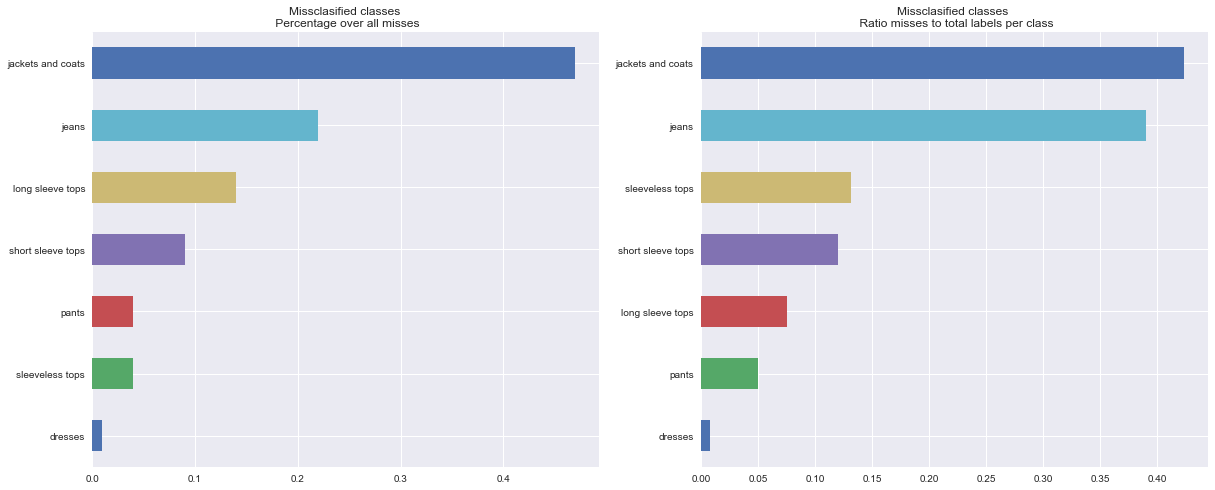

In [20]:
plot_categories(m, test_batches)

### Testing model on DeepFashion images

Picked 1000/1200 images of each of the following classes from the DeepFashion dataset

**Categories DeepFashion** - **Categories MVC**  
Sleeveless Tops      - Tank  
Jeans                - Jeans  
Pants                - Joggers / Sweatpants / Chinos  
Short Sleeve Tops    - Tee / Blouse  
Jackets and Coats    - Jacket / Coat  
Dresses              - Dress  
Long Sleeve Tops     - Blazer / Sweater / Hoodie  

Then visually removed the images that didnt meet the mvc categories

In [22]:
deepfashion_path = "C:/Users/heret/Desktop/fashion-deep-learning/final_categories/test"

deepfashion_test_batch = image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    deepfashion_path, target_size=(150,150), class_mode="categorical", batch_size=200, shuffle=False)

Found 5457 images belonging to 7 classes.


In [23]:
loss, acc = m.evaluate_generator(deepfashion_test_batch)
print(loss, acc)
print((1-acc)*deepfashion_test_batch.n, "images misclassified")

2.2392562011539097 0.428074035771015
3120.999986797571 images misclassified


In [24]:
1/7  #Accuracy of pure random classifier

0.14285714285714285

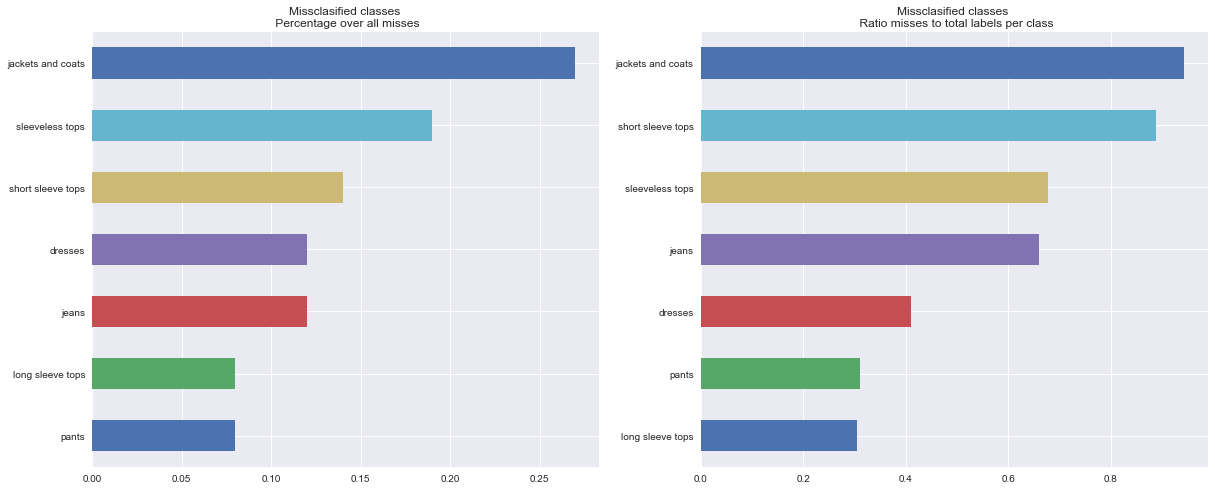

In [25]:
plot_categories(m, deepfashion_test_batch)